In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!pip install konlpy

In [2]:
%matplotlib inline
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도

In [3]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 우선 fm._rebuild() 를 해주고 # 폰트 매니저 재빌드가 필요하다.
fm._rebuild()

NanumGothic Eco


In [4]:
%matplotlib inline
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도
import numpy as np

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔글꼴중 원하는 녀석의 전체
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
## 음수 표시되도록 설정
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic Eco


In [5]:
import konlpy
import nltk
from konlpy.tag import Kkma ### 꼬꼬마
from konlpy.tag import Hannanum ### 한나눔
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [6]:
import pandas as pd
# 봄 인기차트 제목에 '봄'이 많이 들어갈까?

chart_2103 = pd.read_excel("/content/melon_2021.03.xlsx")
chart_2104 = pd.read_excel("/content/melon_2021.04.xlsx")
chart_2105 = pd.read_excel("/content/melon_2021.05.xlsx")

chart_21_spring = chart_2103['제목']+chart_2104['제목']+chart_2105['제목']
chart_21_spring.to_csv("chart_2021_spring.csv")

doc_ko = open("/content/chart_2021_spring.csv").read()
doc_ko[1:2000]

from konlpy.tag import Okt
t = Okt()
doc_nouns = t.nouns(doc_ko)

print( len( doc_nouns ) )

238


In [7]:
ko = nltk.Text(doc_nouns, name="봄_차트")
print(type(ko))
print(len(ko.tokens))


<class 'nltk.text.Text'>
238


In [8]:
most_fre = ko.vocab().most_common(50)
most_fre

[('연애', 11),
 ('길잡이', 11),
 ('나', 10),
 ('사랑', 9),
 ('이별', 7),
 ('별', 6),
 ('모든', 6),
 ('밤', 5),
 ('말', 5),
 ('취향', 4),
 ('저격', 4),
 ('그녀', 4),
 ('순간', 4),
 ('너', 4),
 ('롤린', 3),
 ('라일락', 3),
 ('양요섭', 3),
 ('정은지', 3),
 ('밤하늘', 3),
 ('손', 3),
 ('잠', 3),
 ('취기', 3),
 ('산들', 3),
 ('이', 3),
 ('적재', 3),
 ('꽃', 3),
 ('속', 3),
 ('네', 3),
 ('샴푸', 3),
 ('향', 3),
 ('노래', 3),
 ('그날', 3),
 ('맘', 3),
 ('건', 3),
 ('널', 3),
 ('거지', 3),
 ('날', 3),
 ('추억', 3),
 ('만남', 3),
 ('남아', 3),
 ('봄날', 3),
 ('것', 3),
 ('위', 3),
 ('시', 3),
 ('운전', 2),
 ('만해', 2),
 ('내', 2),
 ('봄', 2),
 ('멜로디', 2),
 ('고백', 2)]

In [9]:
print(len(set(ko.tokens)))

88


In [10]:
stop_words = ['시', '거지', '내', '네', '건', '것', '길잡이', 
              '나', '너', '이', '시', '위', '취기', '정은지', '양요섭', '산들',
              '취향', '저격', '롤린', '로', '마', '말', '아이', '적재', '기리보이',
              '운전', '만해', '서동현', '허각', '선미','움찔', '앞', '규현',
              '제목', '라일락', '손', '라라라', '속', '건호', '건호', '온', '거']
new_ko = [ ]
for one_word in ko:
  if one_word not in stop_words:
    new_ko.append(one_word) 
print(new_ko)

['연애', '밤하늘', '별', '별', '연애', '잠', '사람', '별', '그녀', '밤하늘', '별', '밤', '연애', '봄', '안녕', '봄', '별', '연애', '잠', '연애', '피', '멜로디', '꽃', '샴푸', '향', '그녀', '노래', '밤하늘', '별', '그날', '맘', '사이렌', '사랑', '이별', '사랑', '널', '사랑', '고백', '연애', '연애', '잠', '사실', '바다', '상상', '더하기', '꽃', '샴푸', '향', '밤', '연애', '그냥', '돌림노래', '그녀', '모든', '날', '모든', '순간', '그날', '맘', '노래', '이별', '사랑', '널', '사랑', '마음', '순간', '그녀', '연애', '사랑', '그냥', '밤', '집', '골목길', '추억', '만남', '이별', '남아', '꽃', '샴푸', '향', '봄날', '이별', '사랑', '널', '사랑', '혼술', '밤', '그날', '맘', '오늘', '사실', '추억', '만남', '이별', '남아', '내일', '모든', '날', '모든', '순간', '번호', '영화', '밤', '연애', '봄날', '노래', '마음', '헤픈', '우연', '에필로그', '이별', '혼자', '멜로디', '추억', '만남', '이별', '남아', '모든', '날', '모든', '순간', '고백', '연애', '서면역', '봄날', '오늘', '사랑']


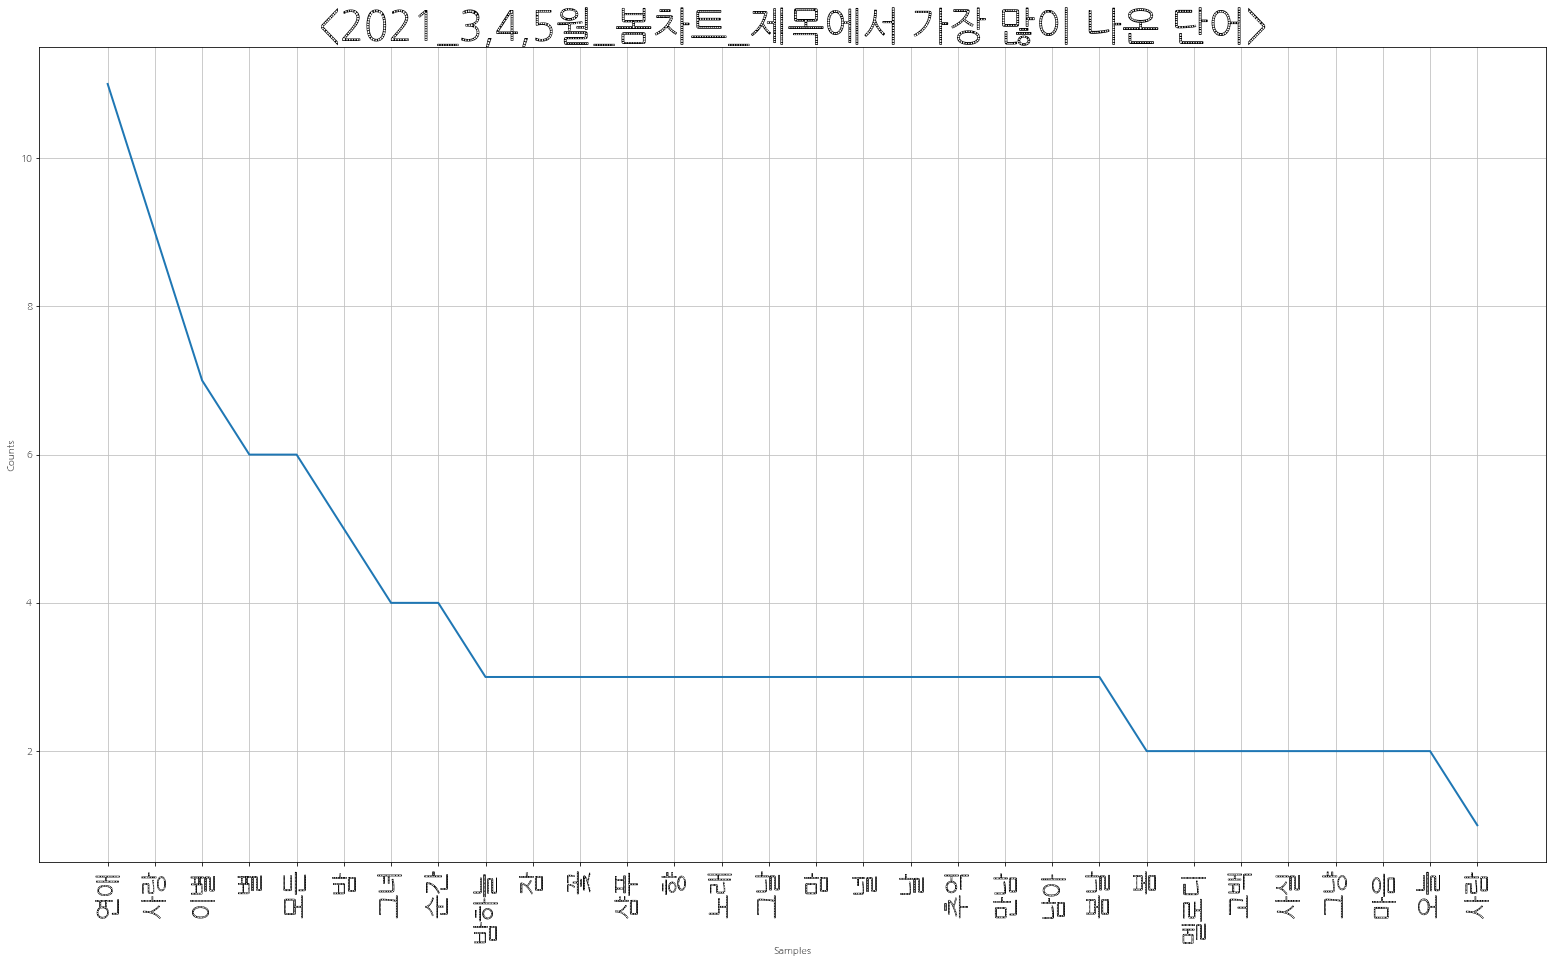

In [84]:
### nltk Text 객체 만들기
new_ko = nltk.Text(new_ko, name="봄_2021")
plt.figure(figsize=(27,15))
plt.title("<2021_3,4,5월_봄차트_제목에서 가장 많이 나온 단어>", fontsize=40)
plt.xticks(fontsize=26)
new_ko.plot(30)

In [12]:
data = new_ko.vocab().most_common(1000)

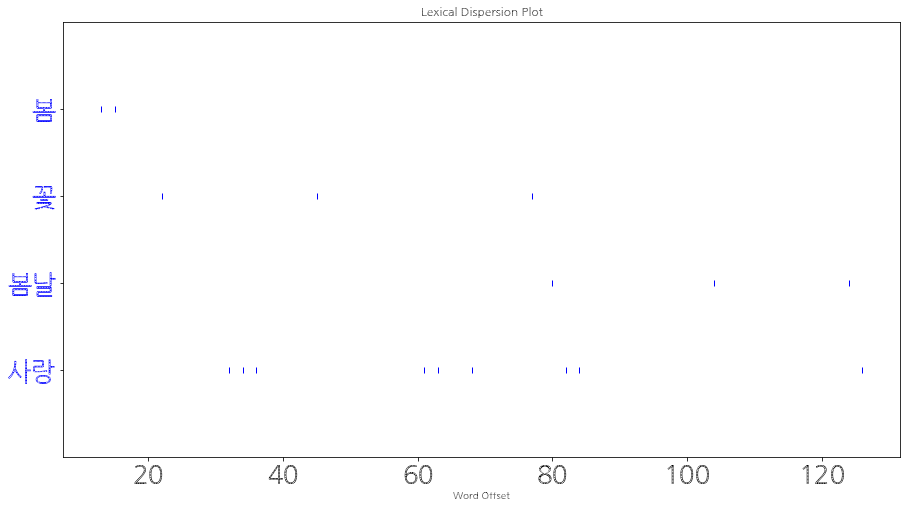

In [93]:
plt.figure(figsize=(15,8))
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
new_ko.dispersion_plot(['봄', '꽃', '봄날','사랑'])

> 이미지 워드클라우드 마스크

In [14]:
pip install stylecloud

In [15]:
import stylecloud

In [21]:
# import stylecloud

# my_long_list = ['시', '거지', '내', '네', '건', '것', '길잡이', 
#               '나', '너', '이', '시', '위', '취기', '정은지', '양요섭', '산들',
#               '취향', '저격', '롤린', '로', '마', '말', '아이', '적재', '기리보이',
#               '운전', '만해', '서동현', '허각', '선미','움찔', '앞', '규현']

# text={"연애":500, "밤하늘":253, "봄":233, "봄날":323, "꽃":322}

# stylecloud.gen_stylecloud(text=text, icon_name="fab fa-itunes-note", 
#                           palette='cartocolors.diverging.TealRose_7', 
#                           custom_stopwords=my_long_list, 
#                           font_path="/content/BMHANNAProOTF.otf")

# stylecloud.gen_stylecloud(file_path="/content/chart_2021_spring", 
#                           icon_name="fab fa-itunes-note", 
#                           palette='cartocolors.diverging.TealRose_7')
# stylecloud.png

In [43]:
melon_mask = np.array(Image.open("/content/melonicon2.png"))
melon_mask[0]


array([[255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       ...,
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0]], dtype=uint8)

In [50]:
wc = WordCloud(font_path="/content/D2Coding.ttf",
              background_color='white', 
               max_words=200,
               mask=melon_mask,   
               contour_width=3, 
               contour_color='lightgreen').generate_from_frequencies(dict(data))

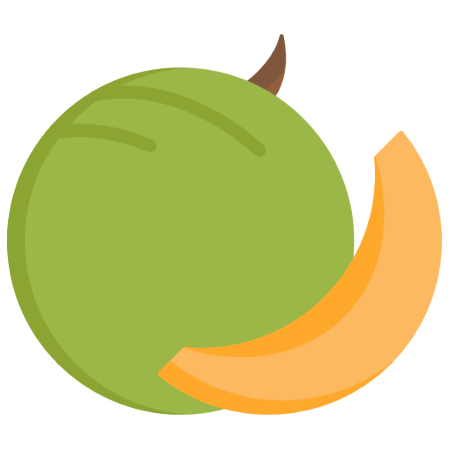

In [51]:
plt.figure(figsize=(15,8)) # 크기
plt.imshow(melon_mask, cmap=plt.cm.gray) #bilinear - 보정
plt.axis('off')
plt.show()

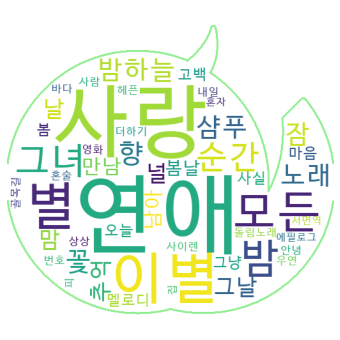

In [52]:
plt.figure(figsize=(10,6))
plt.imshow(wc)
plt.axis("off")
plt.show()